## Lab - Random Variables Distribution

#### Libraries

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 

In [3]:
data=pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

#### Get the numerical variables from our dataset

In [4]:
def check_dataypes(data):
    numerical_discrete = data.select_dtypes(np.number)
    categorical = data.select_dtypes(object)
    
    return numerical_discrete,categorical

In [5]:
numerical_df,categorical_df = check_dataypes(data)

In [6]:
numerical_df.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


#### Get the numerical variables from our dataset

In [9]:
def make_plot(data):
    for col in data.columns:
        sns.set()
        sns.displot(x=data[col], height=4)

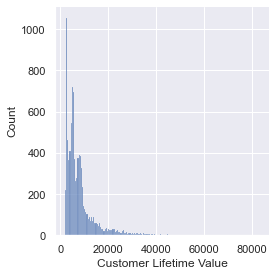

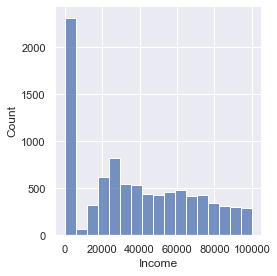

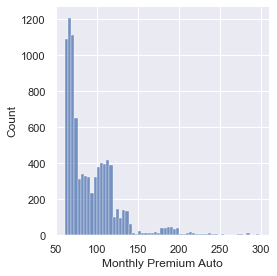

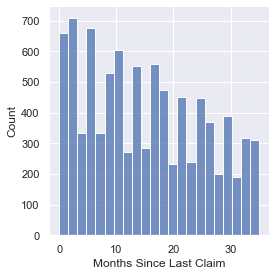

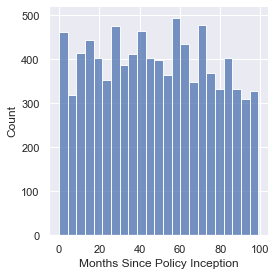

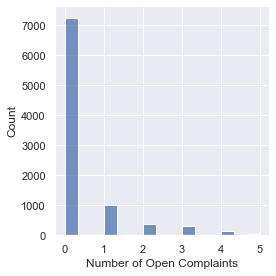

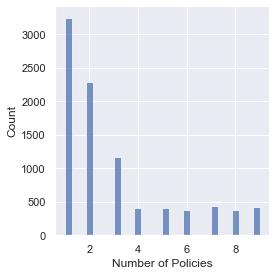

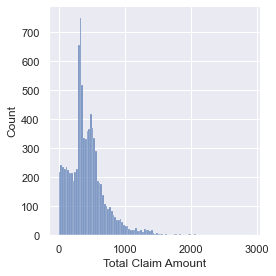

In [10]:
make_plot(numerical_df)

#####  with exception to the plot 'Months since policy Inception', the rest are too skewed to be normally distributed. They mostly follow exponential distribution

#### check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

 The following are behaviors of the different scalers, transformers, and normalizers on our Dataset

#### Min Max Scalar

In [18]:
def mm_scalar(X):
    transformer = MinMaxScaler().fit(X) 
    X_train_scaled = transformer.transform(X)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
    make_plot(X_train_scaled)
    print(f"Mean: {round(X_train_scaled.mean())}")
    print(f"Standard Deviation: {round(X_train_scaled.std())}")

#### Standard Scalar

In [23]:
def ss_scalar(X):
    Standardtransformer = StandardScaler().fit(X)
    X_standardized = Standardtransformer.transform(X)
    X_train_standardized = pd.DataFrame(X_standardized,columns=X.columns)
    make_plot(X_train_standardized)
    print(f"Mean: {round(X_train_standardized.mean())}")
    print(f"Standard Deviation: {round(X_train_standardized.std())}")

Mean: Customer Lifetime Value          0.0
Income                           0.0
Monthly Premium Auto            -0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints       -0.0
Number of Policies               0.0
Total Claim Amount               0.0
dtype: float64
Standard Deviation: Customer Lifetime Value          1.0
Income                           1.0
Monthly Premium Auto             1.0
Months Since Last Claim          1.0
Months Since Policy Inception    1.0
Number of Open Complaints        1.0
Number of Policies               1.0
Total Claim Amount               1.0
dtype: float64


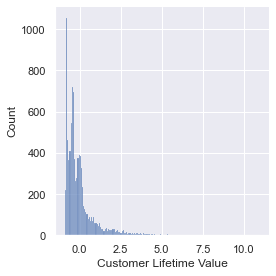

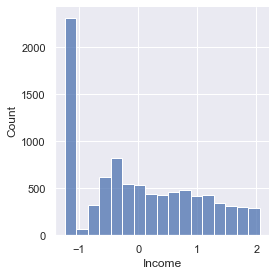

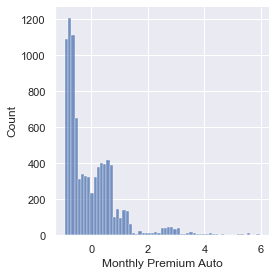

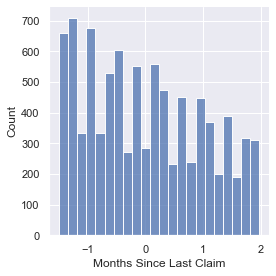

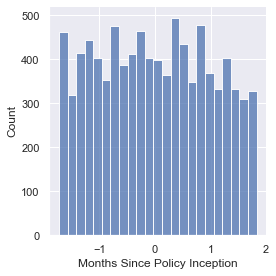

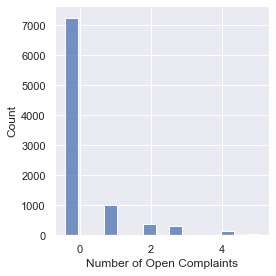

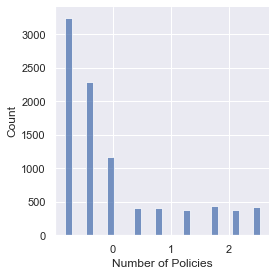

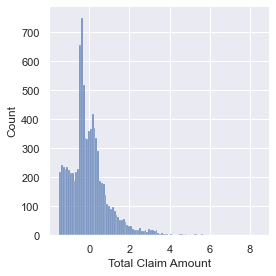

In [24]:
ss_scalar(numerical_df)

#### Power Transformer

In [25]:
def PT_transformer(X):
    pT = PowerTransformer()
    pT.fit(X)
    X_train_PT = pd.DataFrame(pT.transform(X), columns=X.columns)
    make_plot(X_train_PT)
    print(f"Mean: {round(X_train_PT.mean())}")
    print(f"Standard Deviation: {round(X_train_PT.std())}")

#### Mean - Normalizing (experiment)

In [27]:
def mean_normaliser(X):
    X_Train_MN=(X-X.mean())/X.std()
    make_plot(X_Train_MN)
    print(f"Mean: {round(X_Train_MN.mean())}")
    print(f"Standard Deviation: {round(X_Train_MN.std())}")

#### Results:

Mean: Customer Lifetime Value          0.0
Income                           0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Total Claim Amount               0.0
dtype: float64
Standard Deviation: Customer Lifetime Value          0.0
Income                           0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Total Claim Amount               0.0
dtype: float64


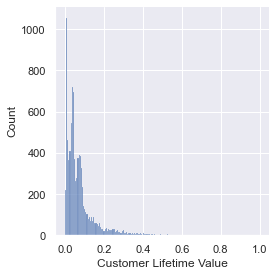

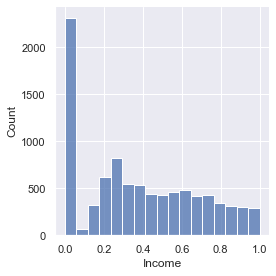

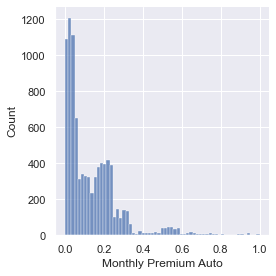

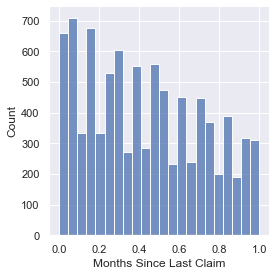

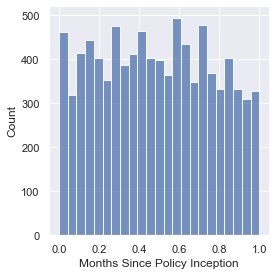

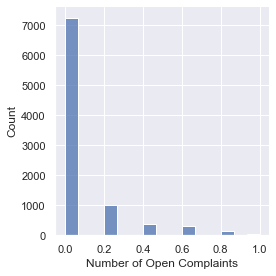

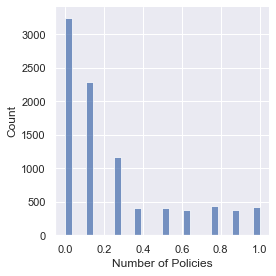

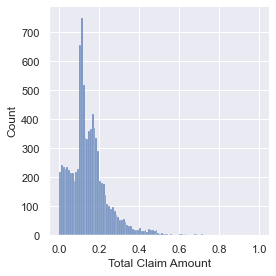

In [19]:
mm_scalar(numerical_df)

Mean: Customer Lifetime Value          0.0
Income                           0.0
Monthly Premium Auto            -0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints       -0.0
Number of Policies              -0.0
Total Claim Amount               0.0
dtype: float64
Standard Deviation: Customer Lifetime Value          1.0
Income                           1.0
Monthly Premium Auto             1.0
Months Since Last Claim          1.0
Months Since Policy Inception    1.0
Number of Open Complaints        1.0
Number of Policies               1.0
Total Claim Amount               1.0
dtype: float64


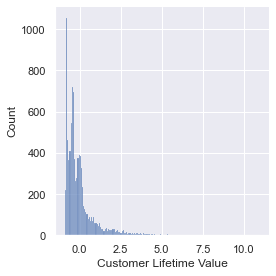

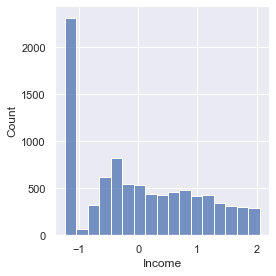

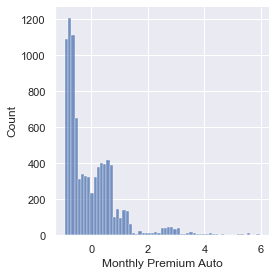

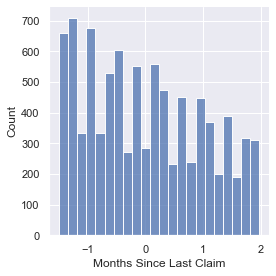

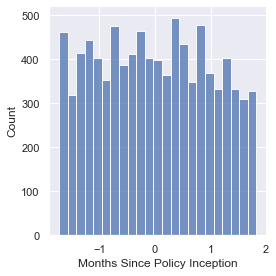

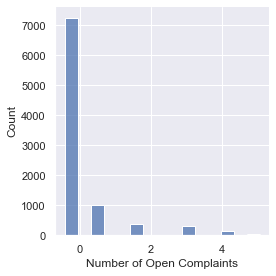

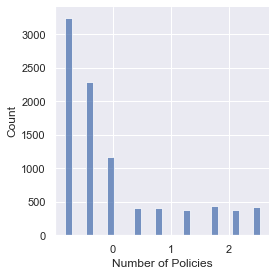

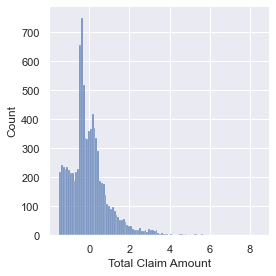

In [28]:
mean_normaliser(numerical_df)

Mean: Customer Lifetime Value          0.0
Income                          -0.0
Monthly Premium Auto             0.0
Months Since Last Claim         -0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies              -0.0
Total Claim Amount              -0.0
dtype: float64
Standard Deviation: Customer Lifetime Value          1.0
Income                           1.0
Monthly Premium Auto             1.0
Months Since Last Claim          1.0
Months Since Policy Inception    1.0
Number of Open Complaints        1.0
Number of Policies               1.0
Total Claim Amount               1.0
dtype: float64


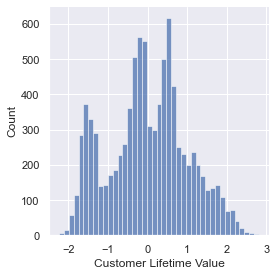

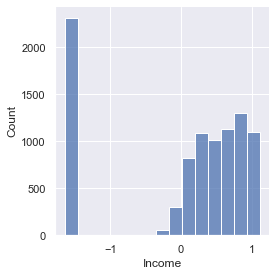

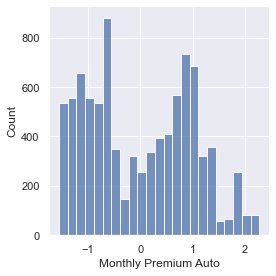

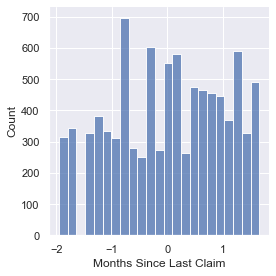

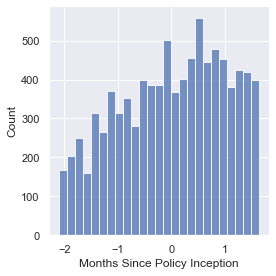

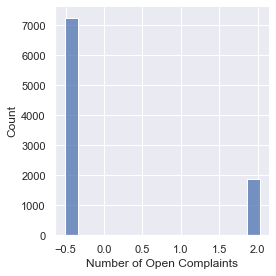

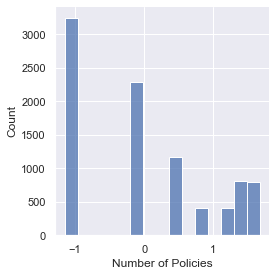

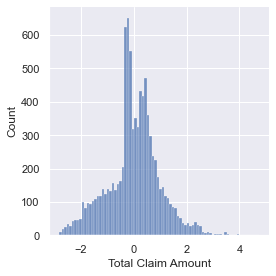

In [26]:
PT_transformer(numerical_df)

#### Conclusion:

##### It is evident that the skewness were drastically reduced by using the Power Transformer in some cases as a Gaussian with zero mean and unit variance.

Resource : https://scikit-learn.org/stable/modules/preprocessing.html